In [1]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive',  force_remount=False)

%cd /content/gdrive/MyDrive/FinalThesis/Bitcoin_Datasets/

Mounted at /content/gdrive
/content/gdrive/MyDrive/FinalThesis/Bitcoin_Datasets


In [2]:
# Import necessary libraries for data analysis and visualization

# NumPy for numerical computations
import numpy as np

# Pandas for data manipulation and analysis
import pandas as pd

# Seaborn for statistical data visualization
import seaborn as sns

# Matplotlib for basic plotting
import matplotlib.pyplot as plt

In [3]:
price_data= pd.read_csv("Bitcoin_prices.csv", engine='python')

In [4]:
price_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
price_data.shape

(3228, 7)

In [6]:
# searching for missing values
price_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# Describe the data
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3228 non-null   object 
 1   Open       3228 non-null   float64
 2   High       3228 non-null   float64
 3   Low        3228 non-null   float64
 4   Close      3228 non-null   float64
 5   Adj Close  3228 non-null   float64
 6   Volume     3228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 176.7+ KB


In [8]:
price_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [9]:
price_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3223,2023-07-15,30331.783203,30407.781250,30263.462891,30295.806641,30295.806641,8011667756
3224,2023-07-16,30297.472656,30437.560547,30089.669922,30249.132813,30249.132813,8516564470
3225,2023-07-17,30249.626953,30336.400391,29685.783203,30145.888672,30145.888672,13240156074
3226,2023-07-18,30147.070313,30233.656250,29556.427734,29856.562500,29856.562500,13138897269
3227,2023-07-20,29919.064453,30224.115234,29918.281250,30189.902344,30189.902344,11906640896


In [10]:
price_data.Volume.nsmallest(3)

32    5914570
81    6491650
80    7009320
Name: Volume, dtype: int64

In [11]:
price_data.Volume.nlargest(3)

2354    350967941479
2436    126358098747
2308    123320567399
Name: Volume, dtype: int64

In [12]:
price_data.loc[32]

Date         2014-10-19
Open         391.253998
High         393.938995
Low          386.457001
Close         389.54599
Adj Close     389.54599
Volume          5914570
Name: 32, dtype: object

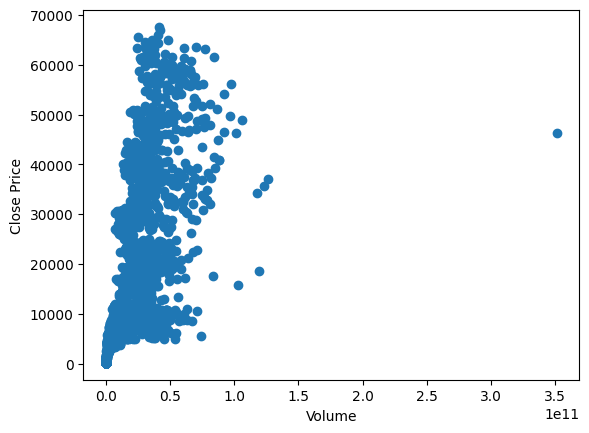

In [13]:
# @title Volume vs Closing Price

import matplotlib.pyplot as plt
plt.scatter(price_data['Volume'], price_data['Close'])
plt.xlabel('Volume')
_ = plt.ylabel('Close Price')

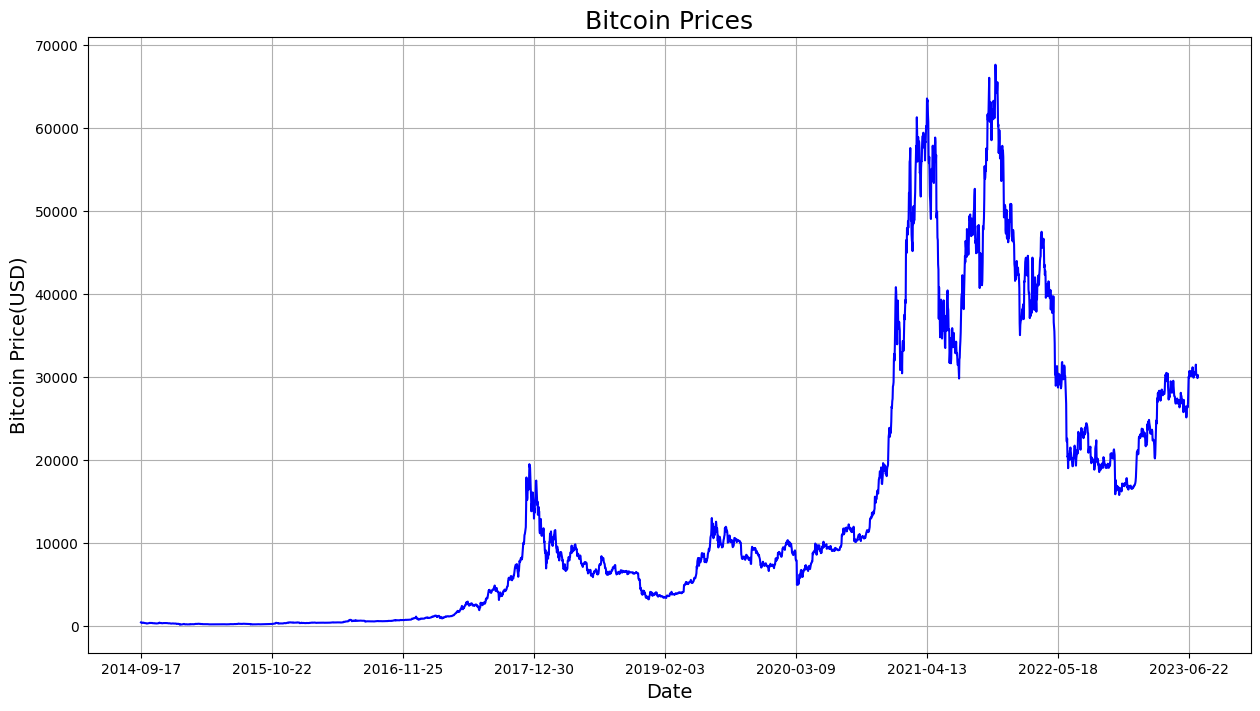

In [14]:
# Plotting the stock prices of Bitcoin
data = price_data
# Line plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(data['Date'], data['Close'], color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Bitcoin Price(USD)', fontsize=14)
plt.title('Bitcoin Prices', fontsize=18)
plt.grid()
plt.show()

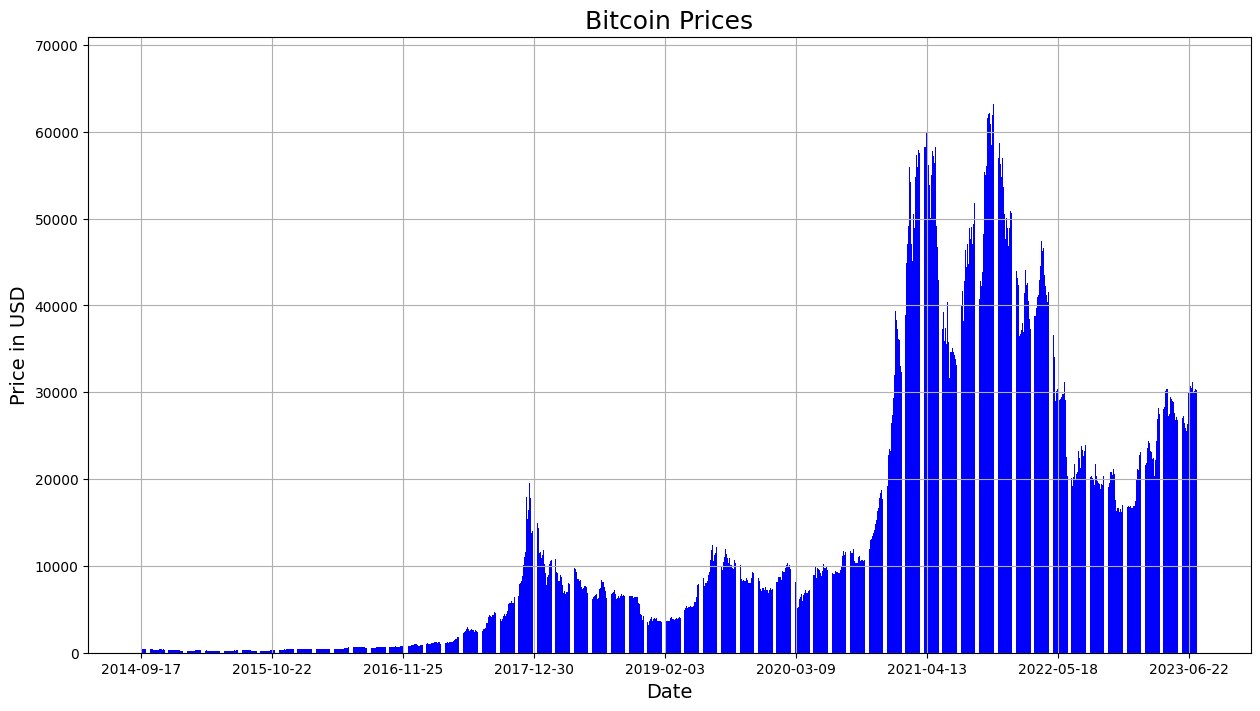

In [15]:
# Bar plot
fig2, ax = plt.subplots(figsize=(15, 8))
ax.bar(data['Date'], data['Close'], color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price in USD', fontsize=14)
plt.title('Bitcoin Prices', fontsize=18)
plt.grid()
plt.show()

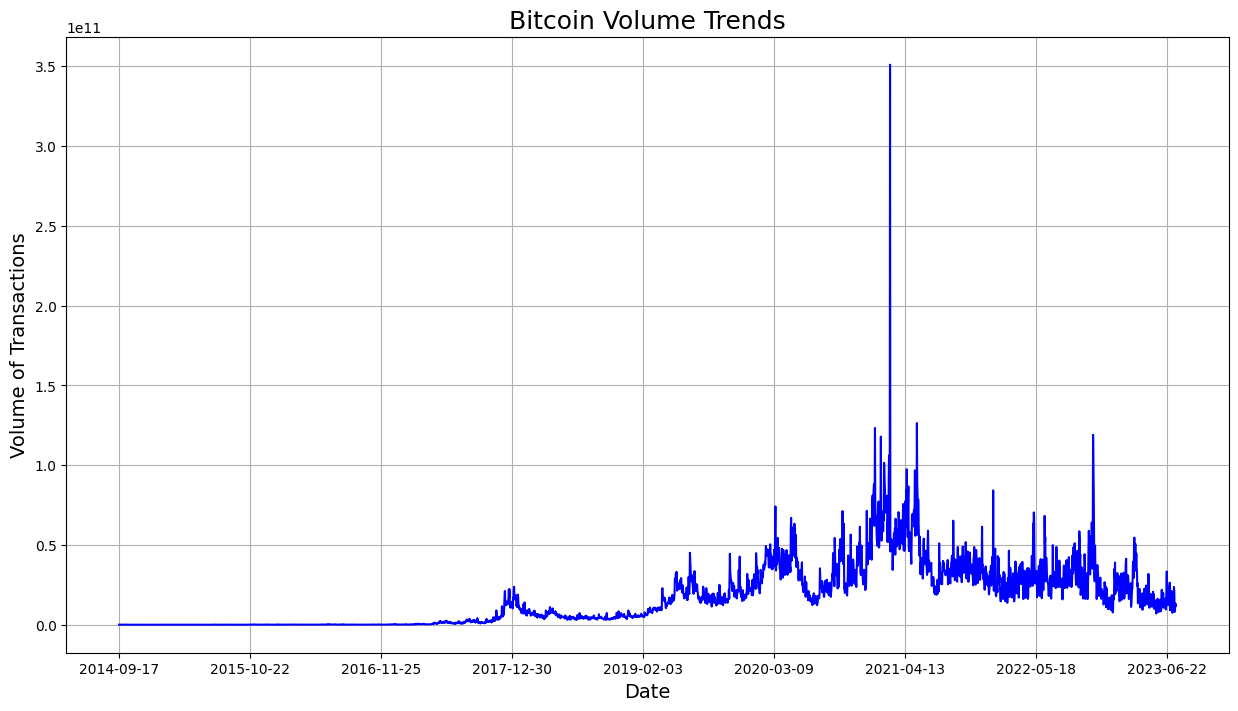

In [16]:
# Plotting the stock prices of Bitcoin
data = price_data
# Line plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(data['Date'], data['Volume'], color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Volume of Transactions', fontsize=14)
plt.title('Bitcoin Volume Trends', fontsize=18)
plt.grid()
plt.show()

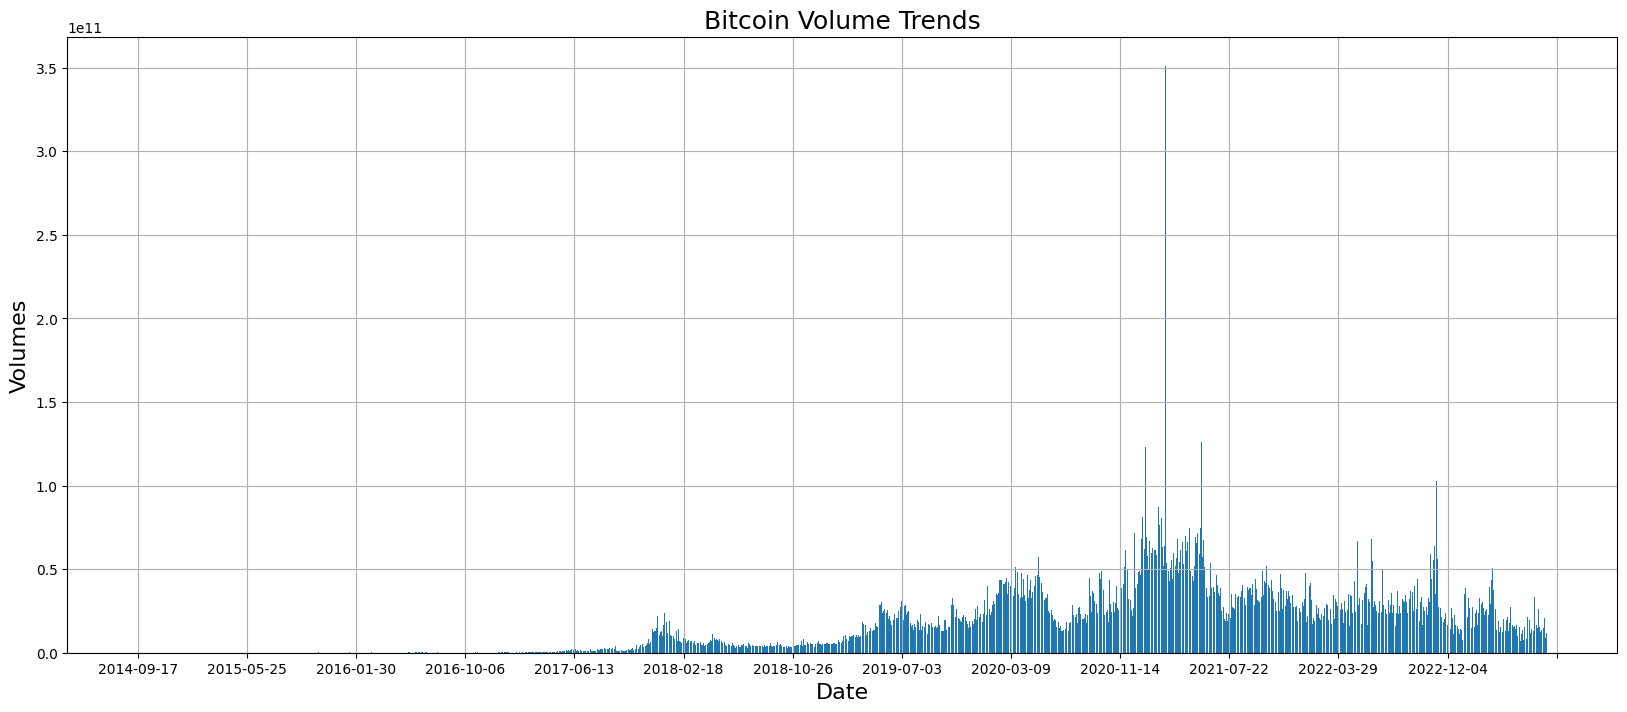

In [17]:

# Bar plot
fig2, ax = plt.subplots(figsize=(20, 8))
ax.bar(data['Date'], data['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Volumes', fontsize=16)
plt.title('Bitcoin Volume Trends', fontsize=18)
plt.grid()
plt.show()

In [18]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [19]:
correlation_df = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
print (correlation_df)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999502  0.999102  0.998791   0.998791  0.703163
High       0.999502  1.000000  0.998986  0.999460   0.999460  0.707599
Low        0.999102  0.998986  1.000000  0.999365   0.999365  0.694451
Close      0.998791  0.999460  0.999365  1.000000   1.000000  0.701851
Adj Close  0.998791  0.999460  0.999365  1.000000   1.000000  0.701851
Volume     0.703163  0.707599  0.694451  0.701851   0.701851  1.000000


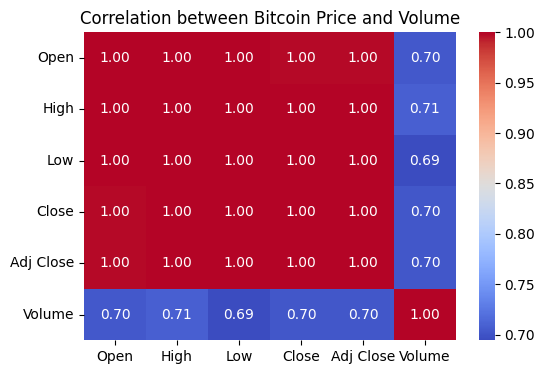

In [20]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Bitcoin Price and Volume')
plt.show()

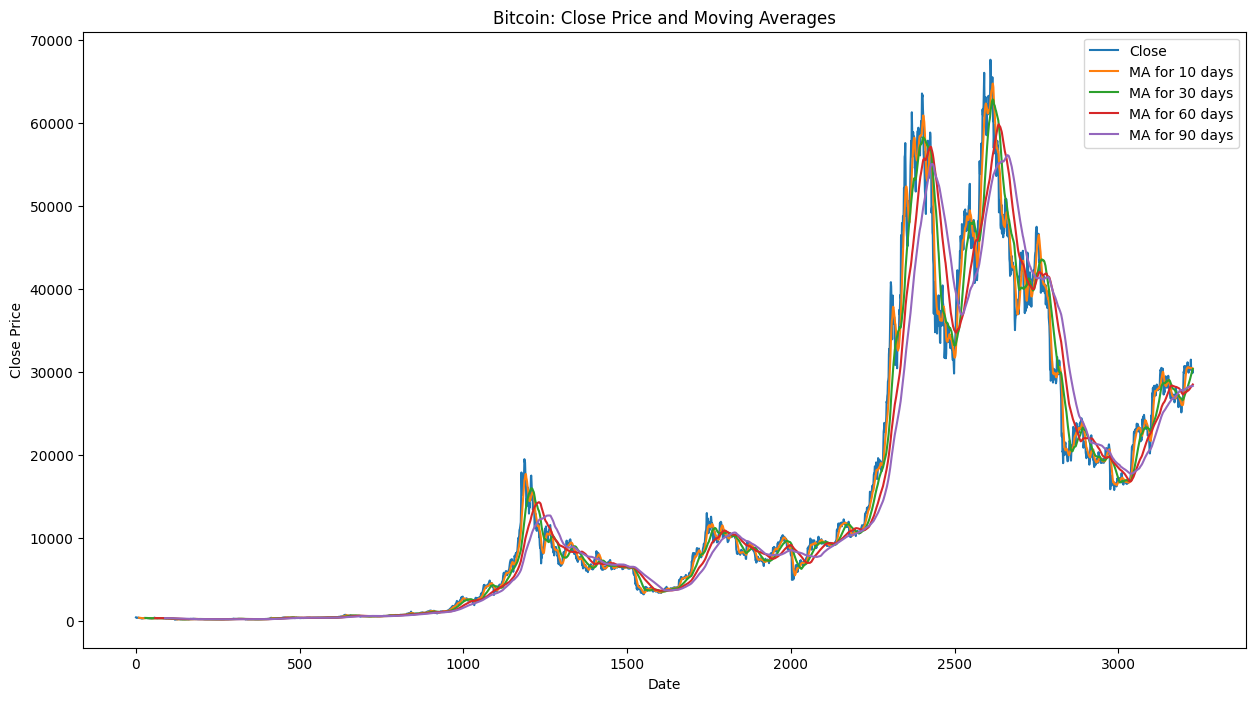

In [21]:
# Calculate moving averages for different windows
data['MA for 10 days'] = data['Close'].rolling(10).mean()
data['MA for 30 days'] = data['Close'].rolling(30).mean()
data['MA for 60 days'] = data['Close'].rolling(60).mean()
data['MA for 90 days'] = data['Close'].rolling(90).mean()

# Truncate the data if needed
truncated_data = data.truncate()

# Plot the adjusted close price and moving averages
truncated_data[['Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days', 'MA for 90 days']].plot(subplots=False, figsize=(15, 8))

# Set the title and axis labels
plt.title('Bitcoin: Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Display the plot
plt.show()

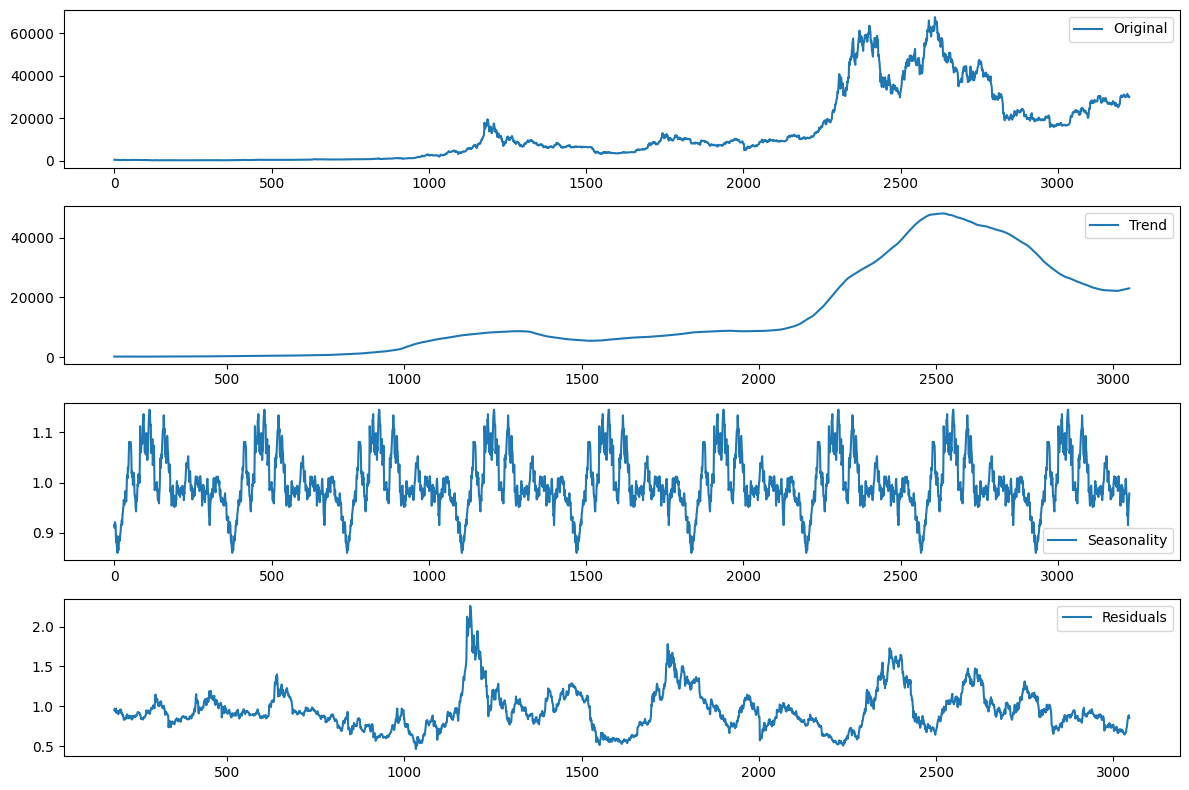

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)

# Plot the original data, the trend, the seasonality, and the residuals
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

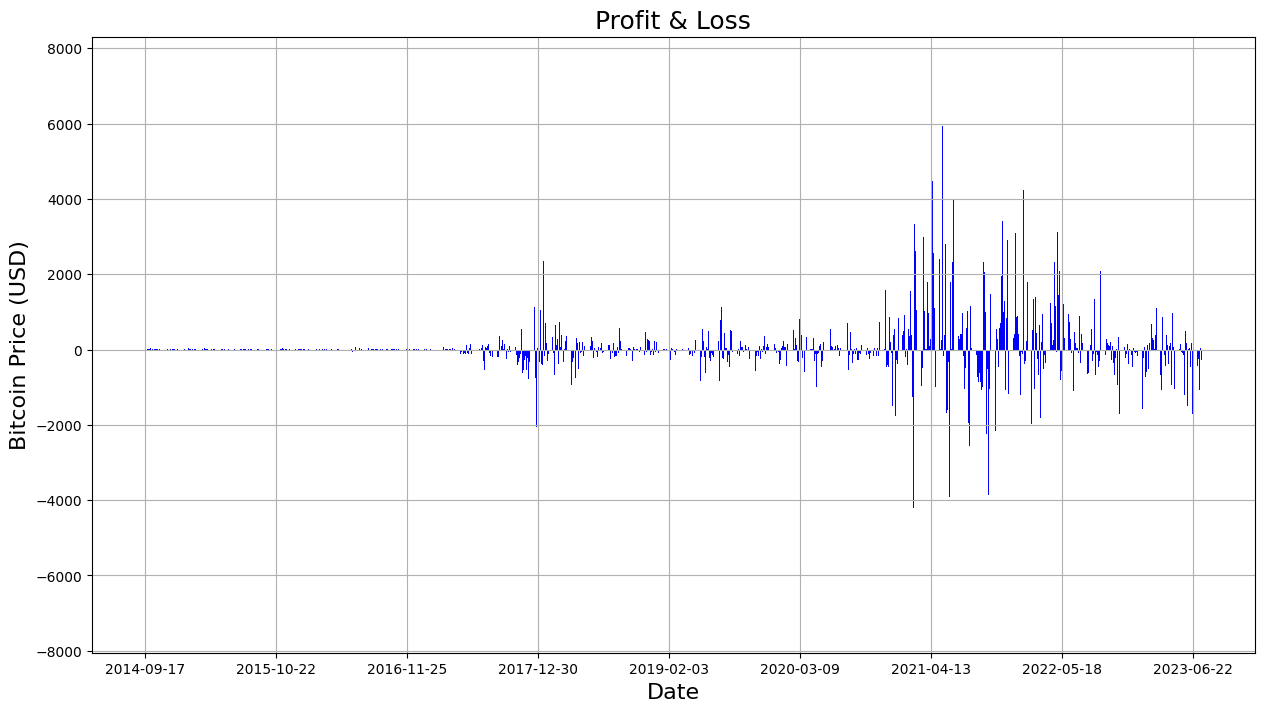

In [25]:

fig, ax = plt.subplots(figsize=(15, 8))
data['Diff'] = data['Open'] - data['Close']
ax.bar(data['Date'], data['Diff'], color = 'blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Bitcoin Price (USD)', fontsize=16)
plt.title('Profit & Loss', fontsize=18)
plt.grid()
plt.show()
